<a href="https://colab.research.google.com/github/Noman160/Project-03-1608016-/blob/main/Project_3(1608016).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course no: ETE456**

**Course Title: Neural and Fuzzy Systems in Communication**

**ID: 1608016**

**Experiment name:** Exploring Neural Network to solve a real world problem

**Objective:**

1.   To classify a real world problem (dibetes) using Neural Network.

**Description:**

The data file was downloaded and read to check if there's any null values available in the dataset. Then the dataset is divided into feature and target values. There was no categorical data in the dataset and hence no encoding technique was applied. After that, dataset is splited into train and test set where train set was used to train the model and test set was used to evaluate the model. Then feature scaling was done to convert large scale values into a normalized form. Neural network model was built to classify dibetes. There were 20 neurons in input layer, 10 neurons in hidden layer and 1 neuron in output layer. Then the model was complied to define loss, optimizer and metrics. The the model was trained to classify dibetes.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Downloading the dataset
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

In [ ]:
#Reading the dataset
dataset = pd.read_csv('diabetes.csv')
dataset

In [ ]:
dataset.columns

In [ ]:
#Checking if there's any null values available in the dataset

print(dataset[pd.isnull(dataset.Pregnancies)])
print(dataset[pd.isnull(dataset.Glucose)])
print(dataset[pd.isnull(dataset.BloodPressure)])
print(dataset[pd.isnull(dataset.SkinThickness)])
print(dataset[pd.isnull(dataset.Insulin)])
print(dataset[pd.isnull(dataset.BMI)])
print(dataset[pd.isnull(dataset.DiabetesPedigreeFunction)])
print(dataset[pd.isnull(dataset.Age)])
print(dataset[pd.isnull(dataset.Outcome)])

In [7]:
#Dividing the data into feature and target values
feature = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
target = dataset[['Outcome']] 

In [ ]:
#Checking the features
feature

In [ ]:
#Checking the targets
target

In [ ]:
#splitting the dataset into train and test set 
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(x_test.shape)

In [11]:
#Standardizing the data for large scale values
x_sc = StandardScaler()
x_train = x_sc.fit_transform(x_train)
x_test = x_sc.transform(x_test)

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
#Building Neural Network model
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
#Defining loss,optimizer and metrics
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    validation_split=0.1)

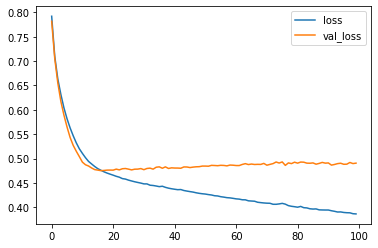

In [16]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

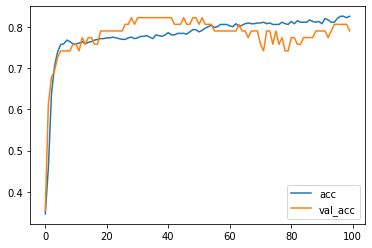

In [17]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')

plt.legend()

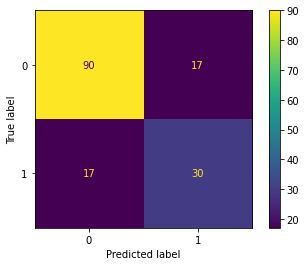

              precision    recall  f1-score   support

          No       0.84      0.84      0.84       107
         Yes       0.64      0.64      0.64        47

    accuracy                           0.78       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.78      0.78      0.78       154



In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
pred = y_pred.astype('uint8')
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

**Result:**

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       107
           1       0.63      0.62      0.62        47

    accuracy                           0.78       154
    macro avg      0.73      0.73      0.73       154
    weighted avg   0.77      0.77      0.77       154

**Conclusion:**

A neural network model was designed to classify dibetes. No encoding technique was applied since there was no categorical value available in the dataset. Large scale values were converted to a normalized form to reduce the complexity of the model. The model provided an accuracy of 78%.